## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


<ipython-input-4-779b96232efc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=filtered_df, palette='Set2')


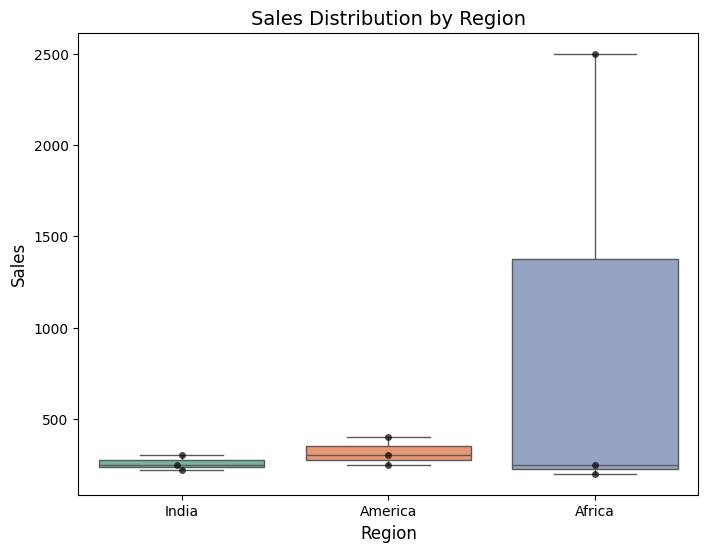

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Region': ['India', 'America', 'Africa', 'India', 'America', 'Africa', 'India', 'America', 'Africa'],
    'Sales': [300, 400, 250, 250, 300, 2500, 220, 250, 200]
}
df = pd.DataFrame(data)

# Filter the DataFrame for the specified regions (optional if data is already clean)
filtered_df = df[df['Region'].isin(['India', 'America', 'Africa'])]

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Sales', data=filtered_df, palette='Set2')
sns.swarmplot(x='Region', y='Sales', data=filtered_df, color='black', alpha=0.7)

# Add labels and title
plt.title('Sales Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Show the plot
plt.show()


**Import Necessary Libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [6]:
df=pd.read_excel('fitness_data.xlsx')
df.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [7]:
df.shape

(50, 5)

## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [8]:
# Calculate the range of "steps_taken" for the entire week
range_steps = df['steps_taken'].max() - df['steps_taken'].min()

# Calculate the range of "calories_burned" for the entire week
range_calories=df.calories_burned.max()-df.calories_burned.min()
# Calculate the Interquartile Range (IQR) for "sleep_duration(hours)"
iqr_sleep = df['sleep_duration(hours)'].quantile(0.75) - df['sleep_duration(hours)'].quantile(0.25)

# Calculate the IQR for "water_intake(ounces)"
iqr_water = df['water_intake(ounces)'].quantile(0.75) - df['water_intake(ounces)'].quantile(0.25)

# Print the results
print(f"Range of 'steps_taken': {range_steps}")
print(f"Range of 'calories_burned': {range_calories}")
print(f"IQR for 'sleep_duration(hours)': {iqr_sleep}")
print(f"IQR for 'water_intake(ounces)': {iqr_water}")

Range of 'steps_taken': 7000
Range of 'calories_burned': 1800
IQR for 'sleep_duration(hours)': 0.5
IQR for 'water_intake(ounces)': 20.0


## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

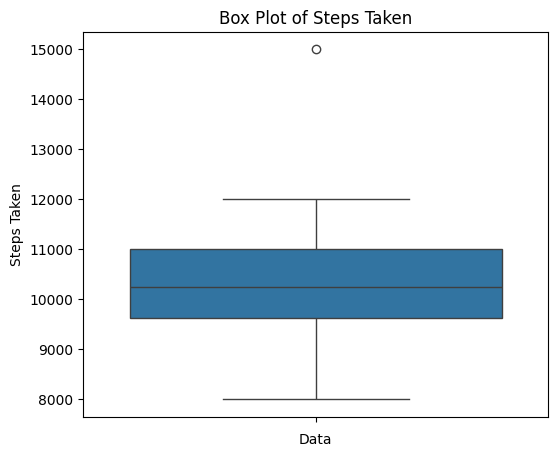

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(df['steps_taken'])
plt.title('Box Plot of Steps Taken')
plt.xlabel('Data')
plt.ylabel('Steps Taken')
plt.show()

#### Observations

- Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
- The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.


## Task4:

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [24]:
#defininig the function
def iqr(data):
  q1,q3=df['sleep_duration(hours)'].quantile([0.25,0.75])
  IQR=q3-q1
  lower=q1=1.5*IQR
  upper=q3+1.5*IQR
  return lower,upper


In [25]:
#get the lower and upper limits
lower,upper=iqr(df['sleep_duration(hours)'])
lower,upper

(0.75, 8.25)

In [26]:
# Identify and label outliers
outliers=df[(df['sleep_duration(hours)']<lower) | (df['sleep_duration(hours)']>upper)]


# Display the outliers
outliers

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
21,Elena,11700,4900,18.0,100


In [27]:
def iqr(data):
  q1,q3=df['steps_taken'].quantile([0.25,0.75])
  IQR=q3-q1
  lower=q1=1.5*IQR
  upper=q3+1.5*IQR
  return lower,upper

In [28]:
lower,upper=iqr(df['steps_taken'])
lower,upper

(2062.5, 13062.5)

In [30]:
# Identify and label outliers
outliers=df[(df['steps_taken']<lower) | (df['steps_taken']>upper)]


# Display the outliers
outliers

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
49,Kiran,15000,5500,8.0,30
